In [9]:
import sys
sys.path.append('../../../modules/')

%reload_ext autoreload
%autoreload 2
import datasets
import ML_classes

import matplotlib.pyplot as plt

In [10]:
MOM6_bucket = 'gs://leap-persistent/dhruvbalwada/MOM6/Phillips2Layer/'
L = 'all'

In [14]:
ML_data = datasets.MOM6_all_transformer('-', 'all')

In [15]:
ML_data.read_datatree(MOM6_bucket, 
                      keep_filt_scale=True, para_perp_out = True)

Dataset loaded from gs://leap-persistent/dhruvbalwada/MOM6/Phillips2Layer/res4km_sponge10day_long_ml_data_50km.zarr
Out para perp
Subsampling
Dataset loaded from gs://leap-persistent/dhruvbalwada/MOM6/Phillips2Layer/res4km_sponge10day_long_ml_data_100km.zarr
Out para perp
Subsampling
Dataset loaded from gs://leap-persistent/dhruvbalwada/MOM6/Phillips2Layer/res4km_sponge10day_long_ml_data_200km.zarr
Out para perp
Subsampling
Dataset loaded from gs://leap-persistent/dhruvbalwada/MOM6/Phillips2Layer/res4km_sponge10day_long_ml_data_400km.zarr
Out para perp
Subsampling


In [16]:
ML_data.generate_test_train_batches(normalize=False)

Test and train batches split. Number of batches: 37-5


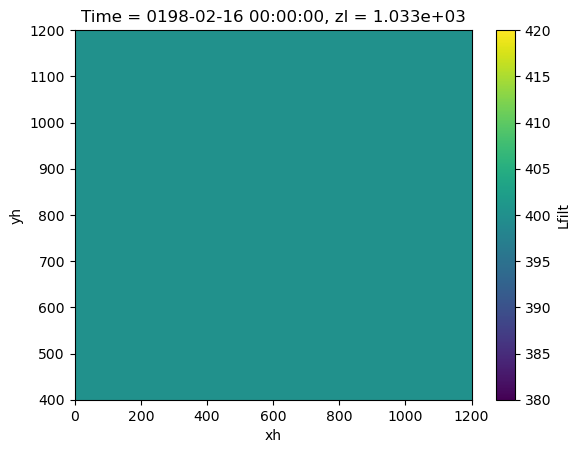

In [28]:
ML_data.ML_dataset.Lfilt.isel(Time=-1).plot()

In [29]:
ANN_model = ML_classes.ANN(num_in = len(ML_data.input_channels))

In [30]:
regress_sys = ML_classes.RegressionSystem(ANN_model, local_norm=True)

In [33]:
%%time
regress_sys.train_system(ML_data, 31, 1)

Train loss step 0:  24.462585011044062 test loss: 6.1954466819763185
Train loss step 1:  5.997315161936992 test loss: 4.81030797958374
Train loss step 2:  5.086141818278545 test loss: 4.322142505645752
Train loss step 3:  4.670899868011475 test loss: 4.023167943954467
Train loss step 4:  4.4086922568243905 test loss: 3.840419340133667
Train loss step 5:  4.24339129473712 test loss: 3.716132116317749
Train loss step 6:  4.126931602890427 test loss: 3.631550979614258
Train loss step 7:  4.048659943245553 test loss: 3.573345184326172
Train loss step 8:  3.9925793506003715 test loss: 3.528901767730713
Train loss step 9:  3.9482431282868258 test loss: 3.4923732757568358
Train loss step 10:  3.9112938932470374 test loss: 3.4604483127593992
Train loss step 11:  3.8795405658515723 test loss: 3.4331079006195067
Train loss step 12:  3.852321399224771 test loss: 3.409948301315308
Train loss step 13:  3.828588292405412 test loss: 3.38988995552063
Train loss step 14:  3.8078822831849792 test loss: 

In [34]:
# Save the checkpoint
CKPT_DIR = '/home/jovyan/mesoscale_buoyancy_param_ML/ML_checkpoints/ckpts_all_MOM6_P2L_window_1_local_norm_true_out_para_perp_Lfilt_in'
regress_sys.save_checkpoint(CKPT_DIR)

# Save model nc file
model_nc = '/home/jovyan/mesoscale_buoyancy_param_ML/ML_model_ncs/' +'MOM6_P2L_all_window_1_local_norm_true_out_para_perp_Lfilt_in'+'.nc'
regress_sys.save_weights_nc(model_nc)

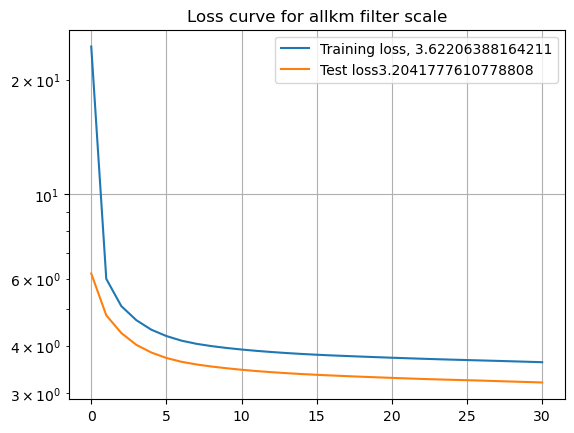

In [35]:
## Loss plot
plt.plot(regress_sys.train_loss, label='Training loss, '+str(regress_sys.train_loss[-1]))
plt.plot(regress_sys.test_loss, label='Test loss'+str(regress_sys.test_loss[-1]))

plt.title('Loss curve for '+ L+ 'km filter scale')
plt.grid()
plt.yscale('log')
plt.legend()

#plt.savefig('figures/MOM6_'+L+'km_loss_curve_36_36.png')

In [14]:
ANN_model_large = ML_classes.ANN(shape=[36,36,2], num_in = len(ML_data.input_channels))

In [18]:
regress_sys_large = ML_classes.RegressionSystem(ANN_model_large, local_norm=True)

In [19]:
%%time
regress_sys_large.train_system(ML_data, 31, 1)

Train loss step 0:  10.386479725708833 test loss: 5.008446979522705
Train loss step 1:  5.3289203257174105 test loss: 4.631331157684326
Train loss step 2:  5.096102946513408 test loss: 4.517623043060302
Train loss step 3:  5.016205310821533 test loss: 4.464121723175049
Train loss step 4:  4.970989214407431 test loss: 4.429570484161377
Train loss step 5:  4.938185872258367 test loss: 4.405003261566162
Train loss step 6:  4.9112177281766325 test loss: 4.382707977294922
Train loss step 7:  4.888203221398431 test loss: 4.360996437072754
Train loss step 8:  4.868420781315984 test loss: 4.349296951293946
Train loss step 9:  4.853387020729683 test loss: 4.338255786895752
Train loss step 10:  4.840775631569527 test loss: 4.325668811798096
Train loss step 11:  4.8302396181467415 test loss: 4.320721626281738
Train loss step 12:  4.82325485590342 test loss: 4.315691947937012
Train loss step 13:  4.8169844472730485 test loss: 4.306829261779785
Train loss step 14:  4.810959687104097 test loss: 4.29

In [20]:
# Save the checkpoint
CKPT_DIR = '/home/jovyan/mesoscale_buoyancy_param_ML/ML_checkpoints/ckpts_all_MOM6_P2L_window_1_local_norm_true_out_para_perp_size_36_36'
regress_sys.save_checkpoint(CKPT_DIR)

# Save model nc file
model_nc = '/home/jovyan/mesoscale_buoyancy_param_ML/ML_model_ncs/' +'MOM6_P2L_all_window_1_local_norm_true_out_para_perp_size_36_36'+'.nc'
regress_sys.save_weights_nc(model_nc)